<a href="https://colab.research.google.com/github/keinam53/Kurs_Pandas/blob/master/10_Case_studies/1_Dane_gieldowe.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Dane giełdowe
1. [Import Bibliotek](#a1)
2. [Załadowanie danych](#a2)
3. [Eksploracja danych](#a3)
4. [Selekcja kolumn](#a4)
5. [Selekcja wierszy](#a5)
6. [Obliczanie nowych kolumn](#a6)
7. [Filtrowanie danych](#a7)

### <a name='a1'></a> Import Bibliotek

In [1]:
import pandas as pd
import numpy as np
import pandas_datareader.data as web

pd.__version__

'1.1.5'

### <a name='a2'></a> Załadowanie danych

In [2]:
def fetch_financial_data(company='AMZN'):
    return web.DataReader(name=company, data_source='stooq')

df = fetch_financial_data()
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1259 entries, 2021-07-30 to 2016-08-01
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    1259 non-null   float64
 1   High    1259 non-null   float64
 2   Low     1259 non-null   float64
 3   Close   1259 non-null   float64
 4   Volume  1259 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 59.0 KB


### <a name='a3'></a> Eksploracja danych

In [3]:
df.head()

,Open,High,Low,Close,Volume
Date,,,,,
2021-07-30,3347.95,3368.1400,3306.98,3327.59,9965593
2021-07-29,3627.75,3637.9500,3580.01,3599.92,5519952
2021-07-28,3633.78,3658.4204,3601.00,3630.32,2999378
2021-07-27,3698.50,3698.5000,3586.15,3626.39,4131890
2021-07-26,3673.17,3712.0800,3647.25,3699.82,2900068


In [4]:
df.columns

Index(['Open', 'High', 'Low', 'Close', 'Volume'], dtype='object')

In [5]:
df.columns = [col.lower() for col in df.columns]
df.head()

,open,high,low,close,volume
Date,,,,,
2021-07-30,3347.95,3368.1400,3306.98,3327.59,9965593
2021-07-29,3627.75,3637.9500,3580.01,3599.92,5519952
2021-07-28,3633.78,3658.4204,3601.00,3630.32,2999378
2021-07-27,3698.50,3698.5000,3586.15,3626.39,4131890
2021-07-26,3673.17,3712.0800,3647.25,3699.82,2900068


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
open,1259.0,1.864460e+03,8.488463e+02,730.00,1080.350,1760.24,2.372120e+03,3.744000e+03
high,1259.0,1.883612e+03,8.593404e+02,743.26,1103.760,1777.42,2.403850e+03,3.773078e+03
low,1259.0,1.842752e+03,8.369528e+02,710.10,1068.710,1743.03,2.340457e+03,3.696793e+03
close,1259.0,1.863767e+03,8.478318e+02,719.07,1097.585,1761.85,2.373855e+03,3.731410e+03
volume,1259.0,4.275325e+06,2.098668e+06,881337.00,2890777.000,3689272.00,5.114930e+06,1.655260e+07


### <a name='a4'></a> Selekcja kolumn

In [7]:
df = df.head(10)
df

,open,high,low,close,volume
Date,,,,,
2021-07-30,3347.950,3368.1400,3306.9800,3327.59,9965593
2021-07-29,3627.750,3637.9500,3580.0100,3599.92,5519952
2021-07-28,3633.780,3658.4204,3601.0000,3630.32,2999378
2021-07-27,3698.500,3698.5000,3586.1500,3626.39,4131890
2021-07-26,3673.170,3712.0800,3647.2500,3699.82,2900068
2021-07-23,3640.000,3666.1100,3622.0400,3656.64,2436292
2021-07-22,3587.230,3640.0200,3582.2700,3638.03,3265352
2021-07-21,3576.375,3586.4500,3543.6415,3585.20,2318989
2021-07-20,3567.320,3592.0000,3518.0000,3573.19,3255680


In [8]:
df[['open', 'close']]

,open,close
Date,,
2021-07-30,3347.950,3327.59
2021-07-29,3627.750,3599.92
2021-07-28,3633.780,3630.32
2021-07-27,3698.500,3626.39
2021-07-26,3673.170,3699.82
2021-07-23,3640.000,3656.64
2021-07-22,3587.230,3638.03
2021-07-21,3576.375,3585.20
2021-07-20,3567.320,3573.19


In [9]:
df.iloc[:, 3:5]

,close,volume
Date,,
2021-07-30,3327.59,9965593
2021-07-29,3599.92,5519952
2021-07-28,3630.32,2999378
2021-07-27,3626.39,4131890
2021-07-26,3699.82,2900068
2021-07-23,3656.64,2436292
2021-07-22,3638.03,3265352
2021-07-21,3585.20,2318989
2021-07-20,3573.19,3255680


### <a name='a5'></a>  Selekcja wierszy

In [10]:
df

,open,high,low,close,volume
Date,,,,,
2021-07-30,3347.950,3368.1400,3306.9800,3327.59,9965593
2021-07-29,3627.750,3637.9500,3580.0100,3599.92,5519952
2021-07-28,3633.780,3658.4204,3601.0000,3630.32,2999378
2021-07-27,3698.500,3698.5000,3586.1500,3626.39,4131890
2021-07-26,3673.170,3712.0800,3647.2500,3699.82,2900068
2021-07-23,3640.000,3666.1100,3622.0400,3656.64,2436292
2021-07-22,3587.230,3640.0200,3582.2700,3638.03,3265352
2021-07-21,3576.375,3586.4500,3543.6415,3585.20,2318989
2021-07-20,3567.320,3592.0000,3518.0000,3573.19,3255680


In [11]:
df.iloc[[0, 1, 2]]

,open,high,low,close,volume
Date,,,,,
2021-07-30,3347.95,3368.1400,3306.98,3327.59,9965593
2021-07-29,3627.75,3637.9500,3580.01,3599.92,5519952
2021-07-28,3633.78,3658.4204,3601.00,3630.32,2999378


In [12]:
df.loc['2021-07-27':'2021-07-22']

,open,high,low,close,volume
Date,,,,,
2021-07-27,3698.50,3698.50,3586.15,3626.39,4131890
2021-07-26,3673.17,3712.08,3647.25,3699.82,2900068
2021-07-23,3640.00,3666.11,3622.04,3656.64,2436292
2021-07-22,3587.23,3640.02,3582.27,3638.03,3265352


### <a name='a6'></a> Obliczanie nowych kolumn

In [13]:
df = fetch_financial_data('MSFT')
df.head()

,Open,High,Low,Close,Volume
Date,,,,,
2021-07-30,285.170,286.660,283.9100,284.91,20944846
2021-07-29,286.235,288.618,286.0800,286.50,18168294
2021-07-28,288.990,290.150,283.8303,286.22,33566853
2021-07-27,289.430,289.575,282.9500,286.54,33604073
2021-07-26,289.000,289.690,286.6420,289.05,23176073


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1259 entries, 2021-07-30 to 2016-08-01
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    1259 non-null   float64
 1   High    1259 non-null   float64
 2   Low     1259 non-null   float64
 3   Close   1259 non-null   float64
 4   Volume  1259 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 59.0 KB


In [15]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Open,1259.0,1.303959e+02,6.363640e+01,52.033,7.788700e+01,108.68,1.808250e+02,2.894300e+02
High,1259.0,1.316376e+02,6.433877e+01,52.402,7.902400e+01,109.60,1.827500e+02,2.901500e+02
Low,1259.0,1.291113e+02,6.299641e+01,50.766,7.730700e+01,107.73,1.791850e+02,2.866420e+02
Close,1259.0,1.304526e+02,6.371583e+01,52.229,7.778150e+01,108.64,1.809900e+02,2.896700e+02
Volume,1259.0,2.910301e+07,1.302743e+07,7764895.000,2.081598e+07,25527813.00,3.325632e+07,1.143455e+08


In [16]:
df['Average'] = (df['Open'] + df['Close']) / 2
df.head()

,Open,High,Low,Close,Volume,Average
Date,,,,,,
2021-07-30,285.170,286.660,283.9100,284.91,20944846,285.0400
2021-07-29,286.235,288.618,286.0800,286.50,18168294,286.3675
2021-07-28,288.990,290.150,283.8303,286.22,33566853,287.6050
2021-07-27,289.430,289.575,282.9500,286.54,33604073,287.9850
2021-07-26,289.000,289.690,286.6420,289.05,23176073,289.0250


In [17]:
df.sort_index(inplace=True)
df.head()

,Open,High,Low,Close,Volume,Average
Date,,,,,,
2016-08-01,52.263,52.402,51.840,52.246,26603065,52.2545
2016-08-02,52.493,52.542,51.996,52.246,34213790,52.3695
2016-08-03,52.338,52.735,52.161,52.604,22444600,52.4710
2016-08-04,52.447,53.112,52.328,52.993,27199679,52.7200
2016-08-05,53.235,53.749,53.048,53.519,28717576,53.3770


In [18]:
df['Close_shift'] = df[['Close']].shift()
df.head()

,Open,High,Low,Close,Volume,Average,Close_shift
Date,,,,,,,
2016-08-01,52.263,52.402,51.840,52.246,26603065,52.2545,NaN
2016-08-02,52.493,52.542,51.996,52.246,34213790,52.3695,52.246
2016-08-03,52.338,52.735,52.161,52.604,22444600,52.4710,52.246
2016-08-04,52.447,53.112,52.328,52.993,27199679,52.7200,52.604
2016-08-05,53.235,53.749,53.048,53.519,28717576,53.3770,52.993


In [19]:
df['Difference'] = df['Close'] / df['Close_shift'] - 1
df['Difference_[%]'] = (df['Difference'] * 100)
df.head()

,Open,High,Low,Close,Volume,Average,Close_shift,Difference,Difference_[%]
Date,,,,,,,,,
2016-08-01,52.263,52.402,51.840,52.246,26603065,52.2545,NaN,NaN,NaN
2016-08-02,52.493,52.542,51.996,52.246,34213790,52.3695,52.246,0.000000,0.000000
2016-08-03,52.338,52.735,52.161,52.604,22444600,52.4710,52.246,0.006852,0.685220
2016-08-04,52.447,53.112,52.328,52.993,27199679,52.7200,52.604,0.007395,0.739487
2016-08-05,53.235,53.749,53.048,53.519,28717576,53.3770,52.993,0.009926,0.992584


In [22]:
del df['Difference']
df.head()

,Open,High,Low,Close,Volume,Average,Close_shift,Difference_[%]
Date,,,,,,,,
2016-08-01,52.263,52.402,51.840,52.246,26603065,52.2545,NaN,NaN
2016-08-02,52.493,52.542,51.996,52.246,34213790,52.3695,52.246,0.000000
2016-08-03,52.338,52.735,52.161,52.604,22444600,52.4710,52.246,0.685220
2016-08-04,52.447,53.112,52.328,52.993,27199679,52.7200,52.604,0.739487
2016-08-05,53.235,53.749,53.048,53.519,28717576,53.3770,52.993,0.992584


In [23]:
df['Difference_[%]'].min()

-14.748155685576192

In [24]:
df['Difference_[%]'].max()

14.223449077437177

In [31]:
max = df['Difference_[%]'] == 14.223449077437177
df[max]

,Open,High,Low,Close,Volume,Average,Close_shift,Difference_[%]
Date,,,,,,,,
2020-03-13,146.02,160.28,139.31,157.24,93669743,151.63,137.66,14.223449


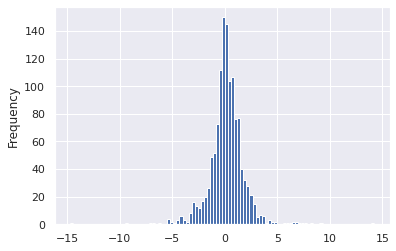

In [37]:
import seaborn as sns
sns.set()

df['Difference_[%]'].plot(kind='hist', bins=100)

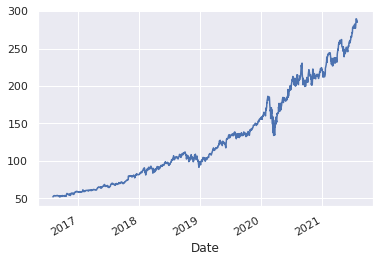

In [38]:
df['Close'].plot()

### <a name='a7'></a> Filtrowanie danych

In [43]:
difference_plus = df['Difference_[%]'] > 0
df_positive = df[difference_plus]
df_positive.head()

,Open,High,Low,Close,Volume,Average,Close_shift,Difference_[%]
Date,,,,,,,,
2016-08-03,52.338,52.735,52.161,52.604,22444600,52.4710,52.246,0.685220
2016-08-04,52.447,53.112,52.328,52.993,27199679,52.7200,52.604,0.739487
2016-08-05,53.235,53.749,53.048,53.519,28717576,53.3770,52.993,0.992584
2016-08-08,53.608,53.635,53.352,53.613,19318362,53.6105,53.519,0.175639
2016-08-09,53.713,54.018,53.576,53.741,17862299,53.7270,53.613,0.238748


In [44]:
df_positive['Difference_[%]'].mean()

1.1485645403898979

In [48]:
df[df.index > '2021-07-19']

,Open,High,Low,Close,Volume,Average,Close_shift,Difference_[%]
Date,,,,,,,,
2021-07-20,278.030,280.970,276.2600,279.32,26259741,278.6750,277.01,0.833905
2021-07-21,278.905,281.520,277.2900,281.40,24364320,280.1525,279.32,0.744666
2021-07-22,283.840,286.420,283.4200,286.14,23384059,284.9900,281.40,1.684435
2021-07-23,287.370,289.990,286.5000,289.67,22768071,288.5200,286.14,1.233662
2021-07-26,289.000,289.690,286.6420,289.05,23176073,289.0250,289.67,-0.214037
2021-07-27,289.430,289.575,282.9500,286.54,33604073,287.9850,289.05,-0.868362
2021-07-28,288.990,290.150,283.8303,286.22,33566853,287.6050,286.54,-0.111677
2021-07-29,286.235,288.618,286.0800,286.50,18168294,286.3675,286.22,0.097827
2021-07-30,285.170,286.660,283.9100,284.91,20944846,285.0400,286.50,-0.554974


In [53]:
df[(df.index > '2021-07-19') & (df.index > '2021-07-22')]

,Open,High,Low,Close,Volume,Average,Close_shift,Difference_[%]
Date,,,,,,,,
2021-07-23,287.370,289.990,286.5000,289.67,22768071,288.5200,286.14,1.233662
2021-07-26,289.000,289.690,286.6420,289.05,23176073,289.0250,289.67,-0.214037
2021-07-27,289.430,289.575,282.9500,286.54,33604073,287.9850,289.05,-0.868362
2021-07-28,288.990,290.150,283.8303,286.22,33566853,287.6050,286.54,-0.111677
2021-07-29,286.235,288.618,286.0800,286.50,18168294,286.3675,286.22,0.097827
2021-07-30,285.170,286.660,283.9100,284.91,20944846,285.0400,286.50,-0.554974


In [56]:
df[df.index.year == 2020]

,Open,High,Low,Close,Volume,Average,Close_shift,Difference_[%]
Date,,,,,,,,
2020-01-02,156.76,158.66,156.31,158.56,22927011,157.660,155.68,1.849949
2020-01-03,156.30,157.92,156.04,156.60,21394597,156.450,158.56,-1.236125
2020-01-06,155.06,157.08,154.50,157.01,21095806,156.035,156.60,0.261814
2020-01-07,157.30,157.65,155.30,155.56,22164477,156.430,157.01,-0.923508
2020-01-08,156.91,158.73,155.93,158.06,28120743,157.485,155.56,1.607097
...,...,...,...,...,...,...,...,...
2020-12-24,220.91,223.10,220.69,222.24,10574872,221.575,220.51,0.784545
2020-12-28,223.93,225.51,222.51,224.44,17974800,224.185,222.24,0.989921
2020-12-29,225.79,226.66,223.07,223.63,17443296,224.710,224.44,-0.360898
